<a href="https://colab.research.google.com/github/hesam-hakimi/hello-world/blob/main/Snippets_Importing_libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing a library that is not in Colaboratory

To import a library that's not in Colaboratory by default, you can use `!pip install` or `!apt-get install`.

In [2]:
pip install hdbscan

     |████████████████████████████████| 6.4MB 13.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311698 sha256=493d504f05b9016c2cd7ae8a475775f7b549b646540e9347316f7714d97b643d
  Stored in directory: /root/.cache/pip/wheels/42/63/fb/314ad6c3b270887a3ecb588b8e5aac50b0fad38ff89bb6dff2
Successfully built hdbscan


[ 0  0  4  0 -1  0  4  7  0  7  3  1  4 -1  0  3  3  4 -1  5  1  4  5  5
 -1 -1 -1  2 -1 -1 -1 -1  8 -1  6  6  8  2 -1  6 -1 -1  0  2  8  7 -1  7
  0]


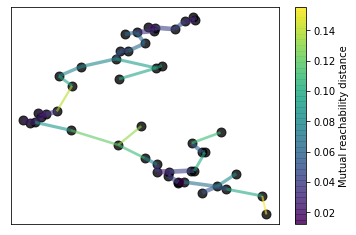

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import pandas as pd
import re
import hdbscan
df = pd.read_csv("data2.csv", sep=r'\s*,\s*',
                 header=0, encoding='ascii', engine='python')

tf = TfidfVectorizer(max_df=0.9, min_df=2, stop_words='english')
x_tf = tf.fit_transform(df['article'])

svd = TruncatedSVD(n_components=2, random_state=0)
x_svd = svd.fit_transform(x_tf)

# training model
clusterer = hdbscan.HDBSCAN(min_cluster_size=2, gen_min_span_tree=True)
clusterer.fit(x_svd)
print(clusterer.labels_)
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)

In [16]:
lst=x_svd.tolist()

In [19]:
clusterer.condensed_tree_

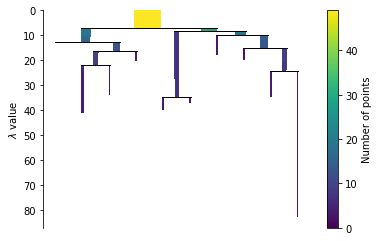

In [20]:
clusterer.condensed_tree_.plot()

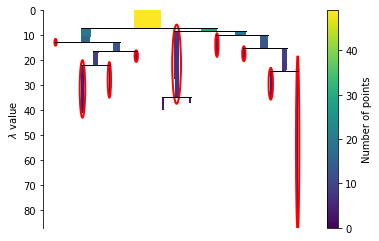

In [21]:
clusterer.condensed_tree_.plot(select_clusters=True,
                               selection_palette=sns.color_palette('deep', 8))

In [22]:
clusterer.condensed_tree_.to_networkx()

In [23]:
g = clusterer.condensed_tree_.to_networkx()
g.number_of_nodes()

68

In [24]:
clusterer.condensed_tree_.to_pandas().head()

,parent,child,lambda_val,child_size
0,49,29,6.436533,1
1,49,50,7.176947,19
2,49,51,7.176947,29
3,50,4,10.345207,1
4,51,31,7.585871,1


In [25]:
tree = clusterer.condensed_tree_.to_pandas()
cluster_tree = tree[tree.child_size > 1]

In [26]:
clusterer.single_linkage_tree_

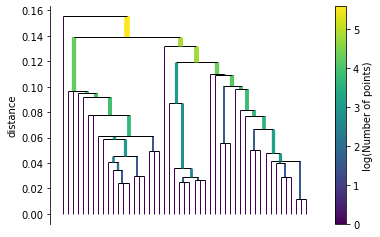

In [27]:
clusterer.single_linkage_tree_.plot()